In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.9/777.9 kB 18.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO as ultralytics_YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivasai1909","key":"b2527a1edaa0223ee3fd4247fb8eacb9"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivasai1909/traffic-sign-detection
!unzip traffic-sign-detection

Streaming output truncated to the last 5000 lines.
  inflating: trafficsign_detection2/trafficsign_detection/train/labels/augmented_image_22_jpg.rf.bbd590529e76526ee51359ab77267c23.txt  
  inflating: trafficsign_detection2/trafficsign_detection/train/labels/augmented_image_22_jpg.rf.be7d76f303848c92b2592fed769059df.txt  
  inflating: trafficsign_detection2/trafficsign_detection/train/labels/augmented_image_22_jpg.rf.c2d2d665bebda67c9f9e1a5e672168fe.txt  
  inflating: trafficsign_detection2/trafficsign_detection/train/labels/augmented_image_22_jpg.rf.c346dfcb334309848b0da97c11be2cc8.txt  
  inflating: trafficsign_detection2/trafficsign_detection/train/labels/augmented_image_22_jpg.rf.c850edec7f78871c4ef39e6b14c28aa1.txt  
  inflating: trafficsign_detection2/trafficsign_detection/train/labels/augmented_image_22_jpg.rf.d16042cd328dc7e7c674393716b85a27.txt  
  inflating: trafficsign_detection2/trafficsign_detection/train/labels/augmented_image_22_jpg.rf.d566a0bdc6b03580db77682564669d56.txt

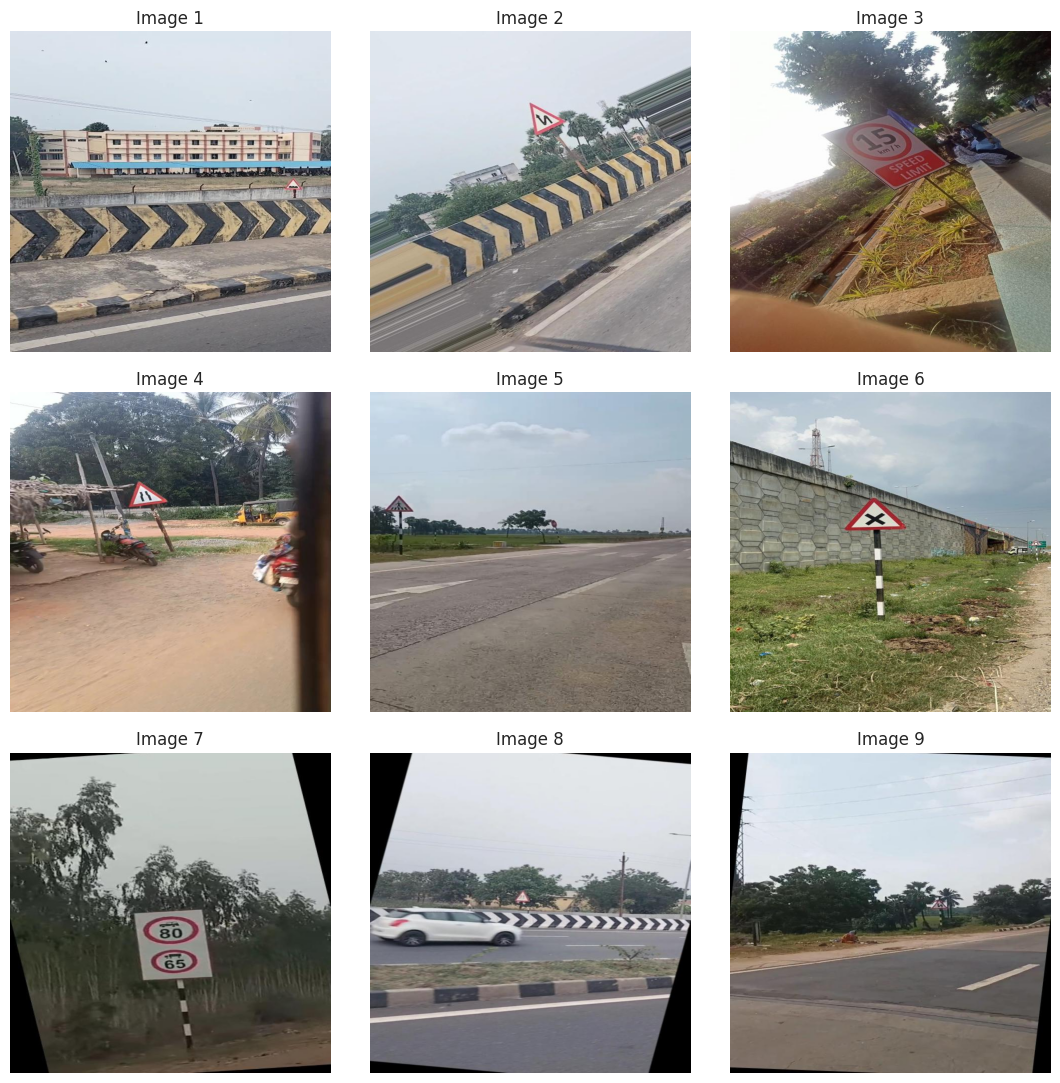

In [ ]:
Image_dir = '/content/trafficsign_detection/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("/content/trafficsign_detection/train/images/1000074713_jpg.rf.ee9f1c0a135f0515fb658a01689abd98.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.


In [ ]:
from ultralytics import YOLO

100%|██████████| 6.23M/6.23M [00:00<00:00, 334MB/s]



image 1/1 /content/trafficsign_detection/train/images/1000074745_jpg.rf.978638f089d9850f9fdcec60ade70f68.jpg: 416x416 (no detections), 9.9ms
Speed: 12.5ms preprocess, 9.9ms inference, 1987.1ms postprocess per image at shape (1, 3, 416, 416)


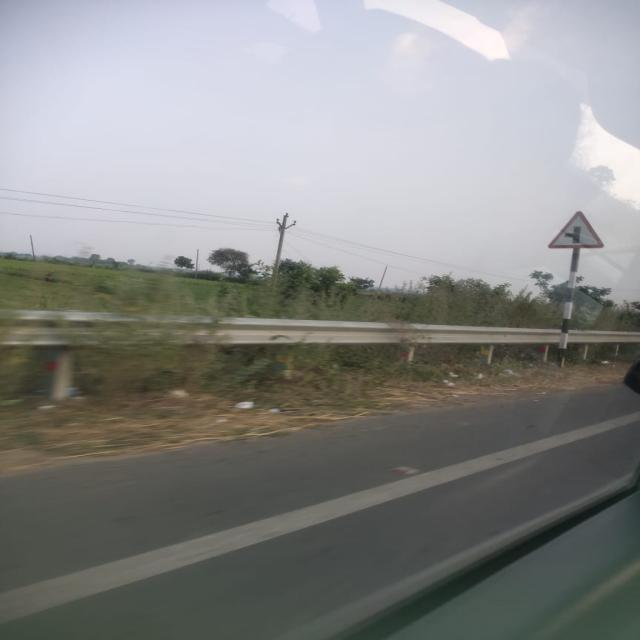

In [ ]:
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/trafficsign_detection/train/images/1000074745_jpg.rf.978638f089d9850f9fdcec60ade70f68.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
import yaml

# Load the existing data.yaml file
with open('/content/trafficsign_detection/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Modify the paths
data['train'] = '/content/trafficsign_detection/train/images'
data['val'] = '/content/trafficsign_detection/test/images'


# Modify number of classes and class names if needed
data['nc'] = 48
data['names'] = [
'Gap_in_median',
'Rumble_strip',
'Two-way-hazard-marker',
'accident_prone_area',
'bump',
'cattle',
'chevronleft',
'chevronright',
'compulsory_ahead',
'compulsory_keep_left',
'cross-roads',
'danger',
'doublecurve_first_to_left',
'giveway',
'go_slow',
'left_hand_curve',
'merging_traffic_from_left',
'narrow_bridge',
'narrow_road',
'no-parking',
'no_entry',
'no_horn',
'no_overtaking',
'object_hazard_to_left',
'object_hazzard_to_right',
'pass-either-side',
'pedestrain-crossing',
'petrol_pump',
'restriction _end',
'right_hand_curve',
'road-widens',
'schoolzone',
'sideroadleft',
'sideroadright',
'speedlimit-15',
'speedlimit-20',
'speedlimit-30',
'speedlimit-40',
'speedlimit-50',
'speedlimit-60',
'speedlimit-65',
'speedlimit-80',
'stop',
'tjuntion-majorroad-ahead',
'tollgate_ahead',
'uneven_roads',
'uturn',
'zigzag']

# Write the updated content back to data.yaml
with open('/content/data.yaml', 'w') as file:
    yaml.safe_dump(data, file)

print("data.yaml file updated successfully!")


data.yaml file updated successfully!


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/data.yaml",epochs=25, imgsz = 640, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/data.yaml, epochs=25, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

train: Scanning /content/trafficsign_detection/train/labels.cache... 4084 images, 59 backgrounds, 0 corrupt: 100%|██████████| 4084/4084 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/trafficsign_detection/test/labels.cache... 1738 images, 19 backgrounds, 0 corrupt: 100%|██████████| 1738/1738 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000192, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      15.2G      1.273      5.382      1.277         98        640: 100%|██████████| 64/64 [01:47<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:28<00:00,  2.00s/it]

                   all       1738       2025     0.0302      0.127     0.0274     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      15.1G      1.278      4.418      1.261        125        640: 100%|██████████| 64/64 [01:34<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.60s/it]


                   all       1738       2025      0.222      0.149       0.13     0.0891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      15.2G      1.264        3.8      1.258         98        640: 100%|██████████| 64/64 [01:34<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.70s/it]


                   all       1738       2025      0.286      0.268      0.227      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      15.2G      1.249      3.412      1.239         99        640: 100%|██████████| 64/64 [01:32<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.57s/it]


                   all       1738       2025      0.292      0.318      0.282      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      15.3G      1.236      3.139      1.244         91        640: 100%|██████████| 64/64 [01:31<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.54s/it]


                   all       1738       2025      0.412      0.385      0.364      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      15.1G      1.206      2.838      1.222         90        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:24<00:00,  1.73s/it]


                   all       1738       2025      0.468      0.428      0.435      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      15.2G      1.204       2.68      1.213        110        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.64s/it]


                   all       1738       2025      0.555      0.454      0.474       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      15.3G      1.198      2.485      1.212         87        640: 100%|██████████| 64/64 [01:33<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.71s/it]


                   all       1738       2025      0.588      0.513       0.54      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      15.1G      1.173      2.318      1.203         94        640: 100%|██████████| 64/64 [01:27<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.70s/it]


                   all       1738       2025      0.571      0.549      0.572      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      15.3G      1.147      2.145      1.185         89        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:24<00:00,  1.72s/it]


                   all       1738       2025      0.638      0.561      0.588      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      15.1G      1.145       2.07      1.186         91        640: 100%|██████████| 64/64 [01:29<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:24<00:00,  1.75s/it]


                   all       1738       2025      0.696      0.563      0.625      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      15.2G      1.155      1.995       1.18        118        640: 100%|██████████| 64/64 [01:29<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.65s/it]


                   all       1738       2025      0.671      0.621       0.65      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      15.1G      1.126      1.863      1.172         95        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.67s/it]

                   all       1738       2025       0.67      0.624      0.644      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      15.2G      1.125      1.822      1.173         97        640: 100%|██████████| 64/64 [01:30<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.70s/it]

                   all       1738       2025      0.681      0.638      0.662      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      15.1G      1.109      1.723      1.162         85        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.56s/it]


                   all       1738       2025      0.738      0.625      0.676      0.455
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      15.3G      1.146      1.825      1.183         58        640: 100%|██████████| 64/64 [01:30<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.66s/it]


                   all       1738       2025      0.724      0.647      0.691      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      15.3G      1.132      1.743      1.171         58        640: 100%|██████████| 64/64 [01:32<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:25<00:00,  1.81s/it]


                   all       1738       2025      0.776      0.648      0.704      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      15.1G      1.119       1.66      1.171         73        640: 100%|██████████| 64/64 [01:35<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.52s/it]

                   all       1738       2025      0.768      0.668      0.709      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      15.1G      1.111      1.607      1.164         72        640: 100%|██████████| 64/64 [01:27<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:26<00:00,  1.87s/it]


                   all       1738       2025      0.751      0.677      0.717      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      15.1G      1.102      1.548      1.158         59        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:24<00:00,  1.78s/it]


                   all       1738       2025      0.791      0.665      0.727      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      15.1G       1.09      1.505      1.154         68        640: 100%|██████████| 64/64 [01:35<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.47s/it]

                   all       1738       2025      0.777      0.695      0.735      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      15.1G      1.081      1.469      1.143         64        640: 100%|██████████| 64/64 [01:38<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:25<00:00,  1.79s/it]

                   all       1738       2025      0.776      0.702      0.741      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      15.2G      1.069      1.442      1.134         59        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:31<00:00,  2.26s/it]

                   all       1738       2025      0.797      0.701      0.746      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      15.1G      1.065      1.414      1.131         56        640: 100%|██████████| 64/64 [01:28<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:25<00:00,  1.81s/it]


                   all       1738       2025      0.785      0.712      0.747      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      15.1G       1.06      1.388      1.137         55        640: 100%|██████████| 64/64 [01:27<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:25<00:00,  1.84s/it]

                   all       1738       2025      0.797      0.714      0.751      0.513



25 epochs completed in 0.824 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3015008 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:33<00:00,  2.39s/it]


                   all       1738       2025      0.797      0.714      0.751      0.513
         Gap_in_median       1738         60      0.778      0.733      0.766      0.505
          Rumble_strip       1738         64      0.813      0.688      0.778      0.514
 Two-way-hazard-marker       1738         64      0.919      0.529      0.641      0.355
   accident_prone_area       1738         35      0.782      0.857      0.842        0.7
                  bump       1738         53      0.794      0.717      0.758      0.535
                cattle       1738         37      0.851      0.838      0.837      0.585
           chevronleft       1738         49      0.826      0.678      0.675      0.403
          chevronright       1738         62      0.611      0.581      0.616      0.339
      compulsory_ahead       1738         32      0.957          1      0.993      0.833
  compulsory_keep_left       1738         40      0.782      0.875      0.846      0.564
           cross-road

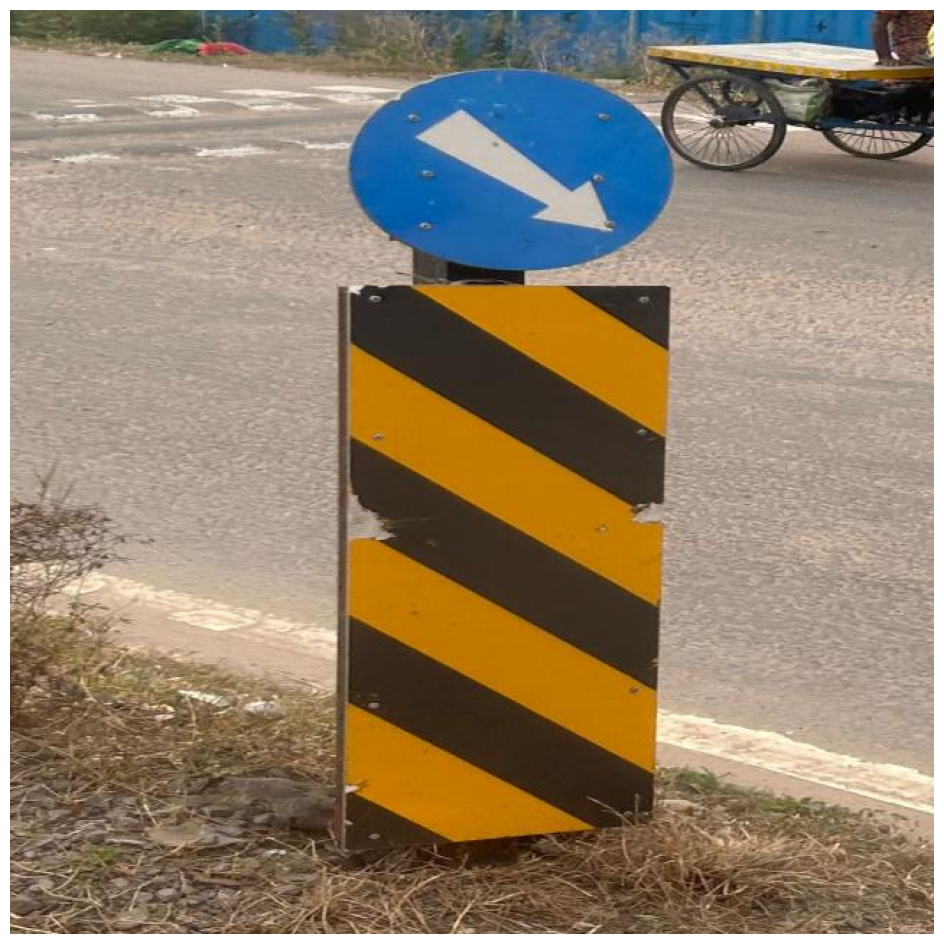

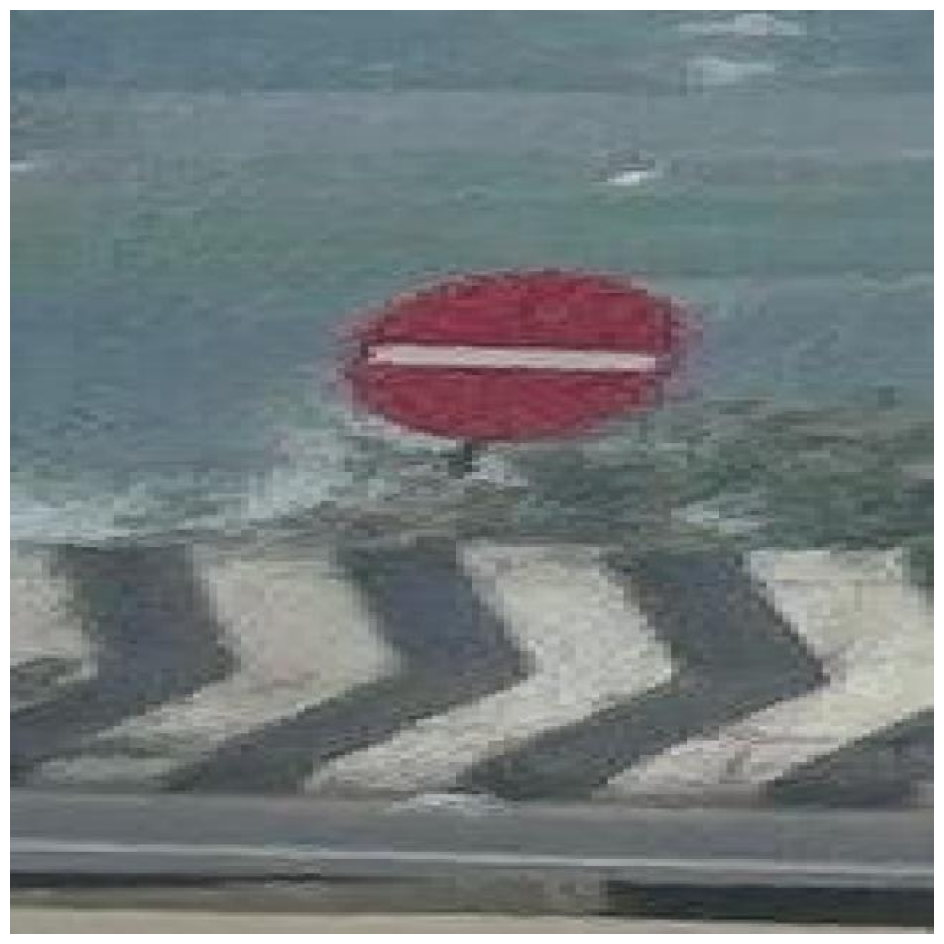

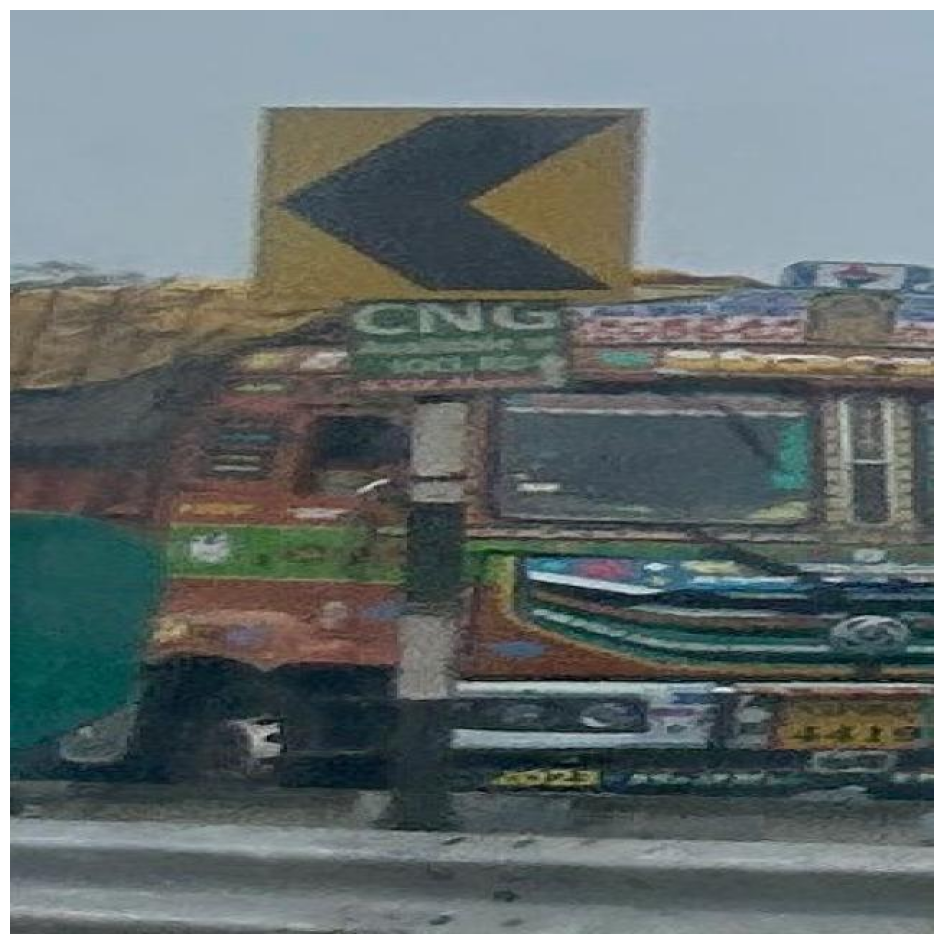

In [ ]:
import cv2
import matplotlib.pyplot as plt

# List of image paths
list_of_metrics = [
    '/content/trafficsign_detection/train/images/1000074737_jpg.rf.ce73cefa3c1f476add4bc7d350c51074.jpg',
    '/content/trafficsign_detection/train/images/1000074902_jpg.rf.1b31a1ec11724f7339a6932fcc9b7432.jpg',
    '/content/trafficsign_detection/train/images/1000074929_jpg.rf.5849d9a2ce7eb2c0e92fd0ac6c6b954f.jpg'
]

# Display each image
for image_path in list_of_metrics:
    # Load the image
    image = cv2.imread(image_path)

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis

    # Show the plot
    plt.show()


In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train3/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
15                       16                   1.1459                   1.8250   
16                       17                   1.1325                   1.7425   
17                       18                   1.1187                   1.6600   
18                       19                   1.1108                   1.6074   
19                       20                   1.1024                   1.5478   
20                       21                   1.0896                   1.5050   
21                       22                   1.0805                   1.4686   
22                       23                   1.0691                   1.4421   
23                       24                   1.0645                   1.4140   
24                       25                   1.0604                   1.3878   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
15                   1.1829                  0.72364                  0.64731   
16                   1.1711                  0.77605                  0.64846   
17                   1.1711                  0.76848                  0.66791   
18                   1.1643                  0.75123                  0.67730   
19                   1.1578                  0.79100                  0.66520   
20                   1.1535                  0.77739                  0.69511   
21                   1.1430                  0.77598                  0.70191   
22                   1.1340                  0.79659                  0.70067   
23                   1.1315                  0.78527                  0.71177   
24                   1.1367                  0.79719                  0.71359   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
15                  0.69093                  0.46250                   1.2530   
16                  0.70400                  0.47357                   1.2366   
17                  0.70891                  0.47824                   1.2486   
18                  0.71662                  0.48755                   1.2284   
19                  0.72655                  0.49322                   1.2248   
20                  0.73503                  0.49527                   1.2323   
21                  0.74067                  0.50276                   1.2328   
22                  0.74629                  0.50794                   1.2249   
23                  0.74695                  0.50808                   1.2153   
24                  0.75145                  0.51275                   1.2148   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
15                   1.3050                   1.2280                 0.000078   
16                   1.2515                   1.2122                 0.000070   
17                   1.2526                   1.2081                 0.000063   
18                   1.1980                   1.1990                 0.000055   
19                   1.1940                   1.2011                 0.000048   
20                   1.1674                   1.2025                 0.000040   
21                   1.1703                   1.1996                 0.000032   
22                   1.1340                   1.1963                 0.000025   
23                   1.1280                   1.1917                 0.000017   
24                   1.1185                   1.1921                 0.000010   

                     lr/pg1                   lr/pg2  
15                 0.000078                 0.000078  
16                 0.000070                 0.000070  
17                 0.000063                 0.000063  
18                 0.000055                 0.000055  
19                 0.000048                 0.000048  
20                 0.000040                 0.000040  
21                 0.000032                 0.000032  
22            

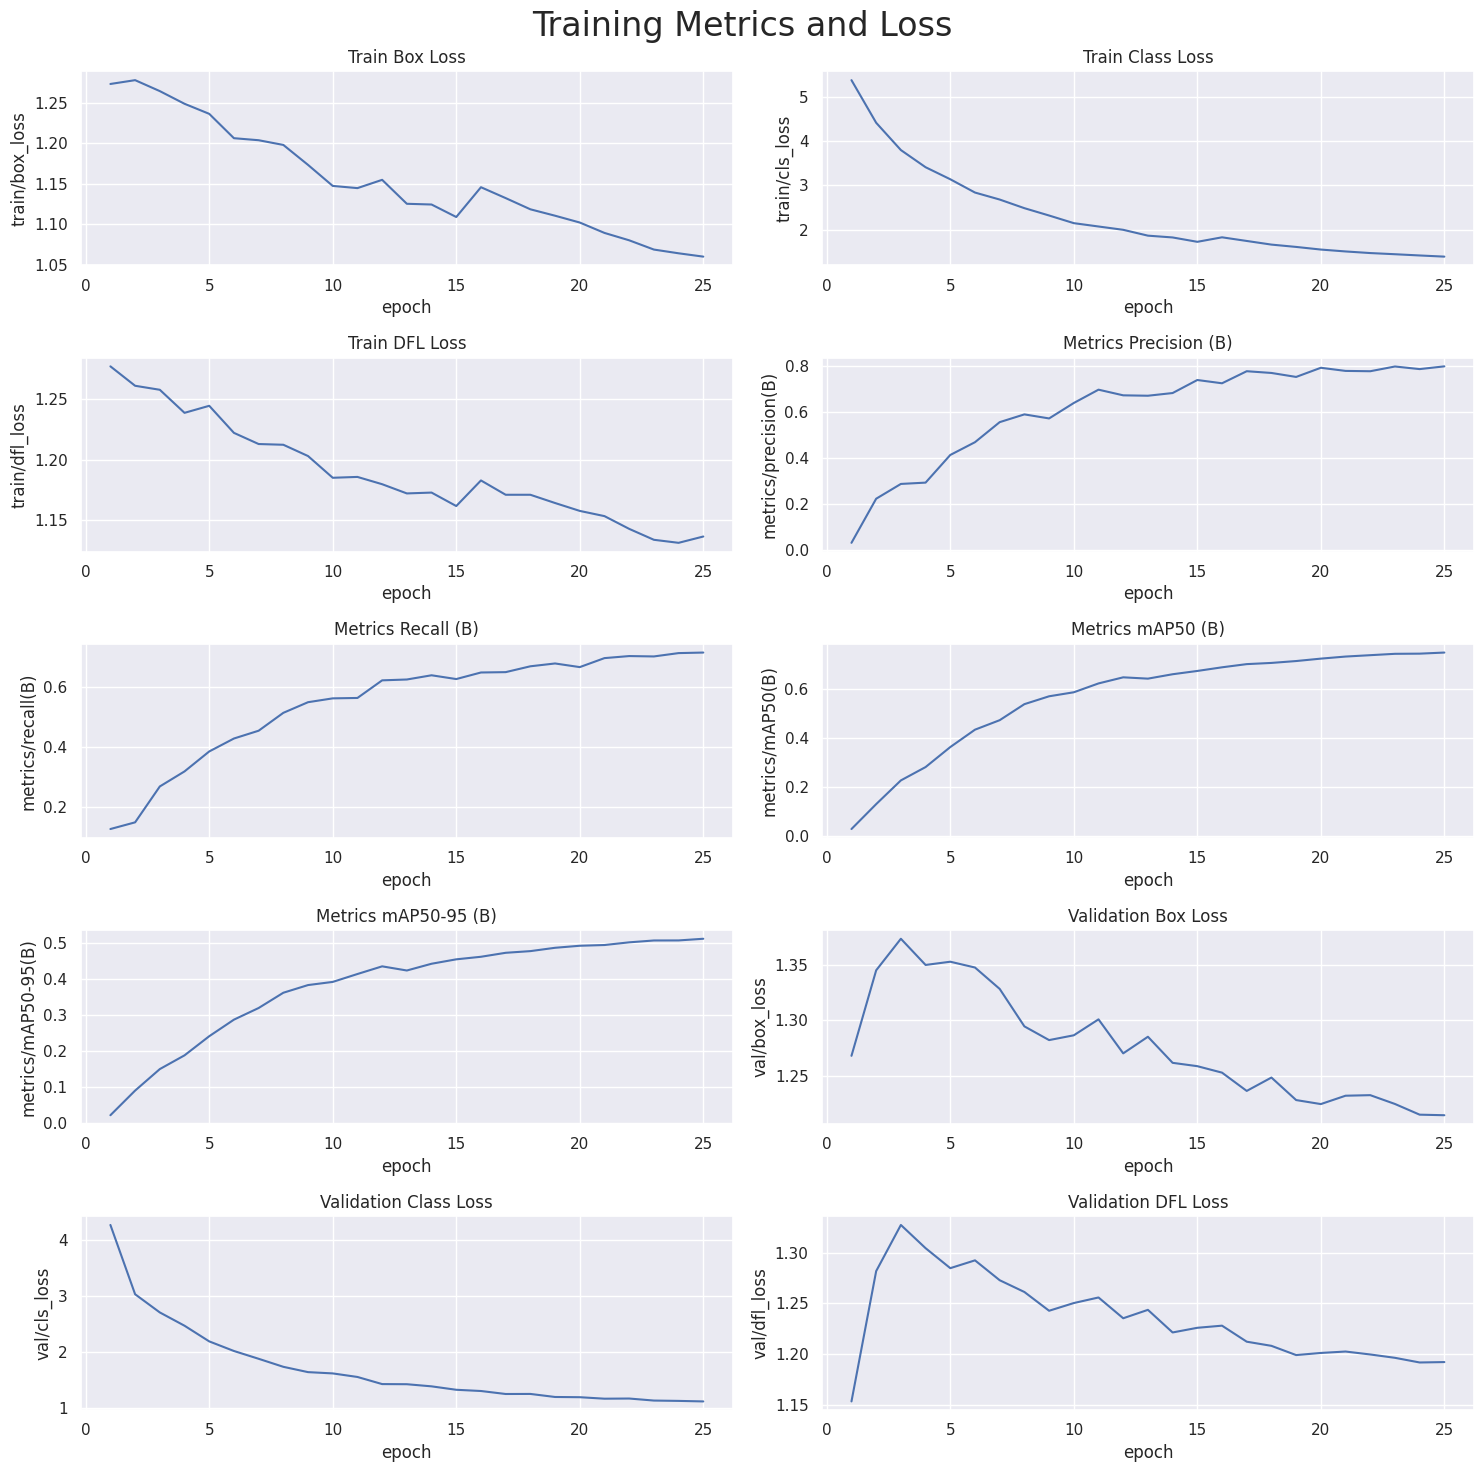

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to your results CSV file
csv_path = '/content/runs/detect/train3/results.csv'

# Read the results.csv file as a pandas dataframe
df = pd.read_csv(csv_path)

# Optionally strip any leading or trailing whitespace from the column names
df.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.9)  # Adjust top to fit the suptitle
plt.tight_layout()
plt.show()


In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train3/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'val')

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3015008 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/trafficsign_detection/test/labels.cache... 1738 images, 19 backgrounds, 0 corrupt: 100%|██████████| 1738/1738 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 109/109 [00:29<00:00,  3.72it/s]


                   all       1738       2025      0.796      0.713      0.751      0.512
         Gap_in_median       1738         60      0.777      0.733      0.766      0.506
          Rumble_strip       1738         64      0.815      0.688      0.777      0.512
 Two-way-hazard-marker       1738         64      0.919      0.529      0.635      0.349
   accident_prone_area       1738         35      0.782      0.857      0.842        0.7
                  bump       1738         53      0.794      0.717      0.757      0.535
                cattle       1738         37       0.85      0.838      0.837      0.582
           chevronleft       1738         49      0.826      0.677      0.675      0.392
          chevronright       1738         62       0.61      0.581      0.615      0.335
      compulsory_ahead       1738         32      0.957          1      0.993      0.833
  compulsory_keep_left       1738         40      0.781      0.875      0.845      0.564
           cross-road

In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.7958811897324197
metrics/recall(B):  0.7126383464304373
metrics/mAP50(B):  0.7513902071433304
metrics/mAP50-95(B):  0.5116616087482182


In [ ]:
# Path to the directory containing the images
image_dir = '/content/trafficsign_detection/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 no-parking, 14.6ms
Speed: 2.4ms preprocess, 14.6ms inference, 4.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train32

0: 416x416 1 chevronleft, 22.9ms
Speed: 5.5ms preprocess, 22.9ms inference, 7.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train33

0: 416x416 1 chevronleft, 14.5ms
Speed: 4.8ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train34

0: 416x416 1 no_overtaking, 25.0ms
Speed: 2.1ms preprocess, 25.0ms inference, 13.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train35

0: 416x416 1 no_overtaking, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train36

0: 416x416 (no detections), 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/d

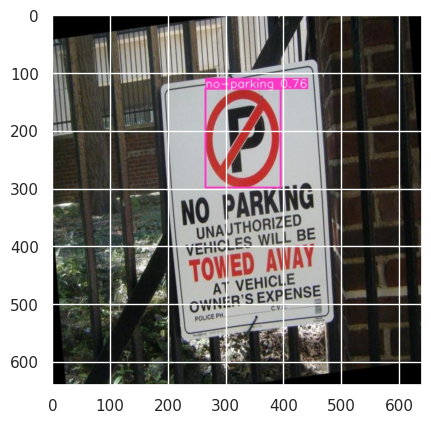

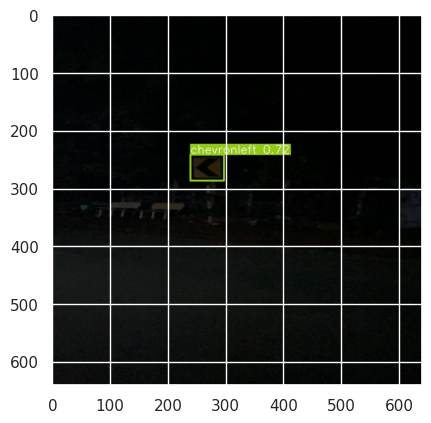

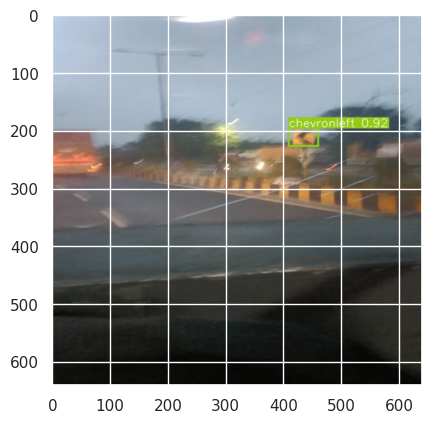

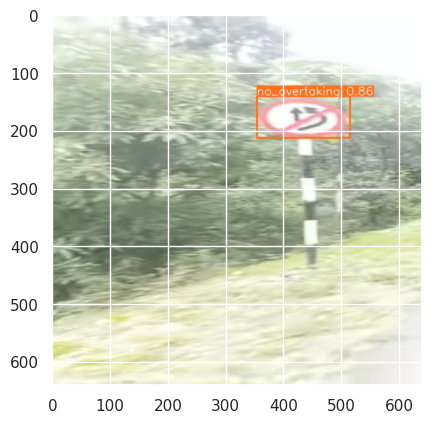

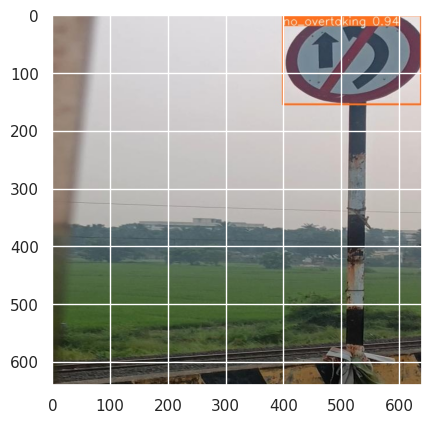

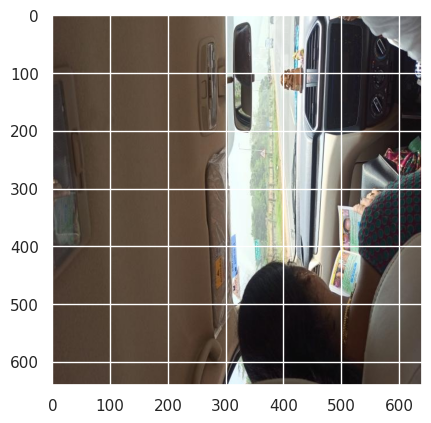

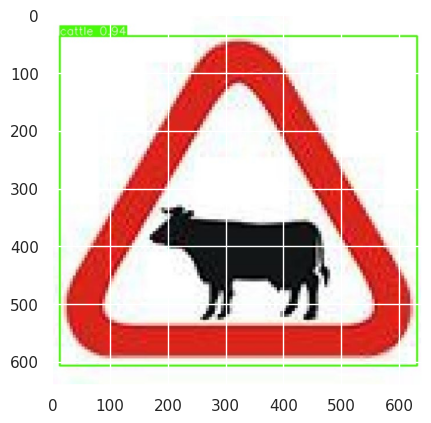

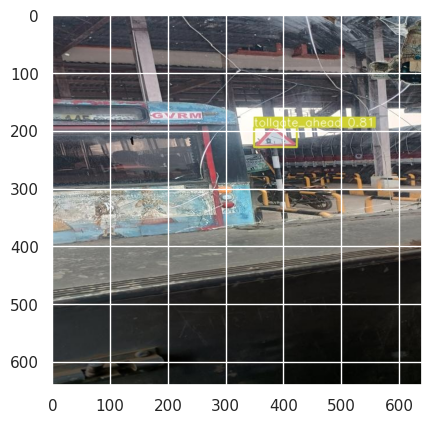

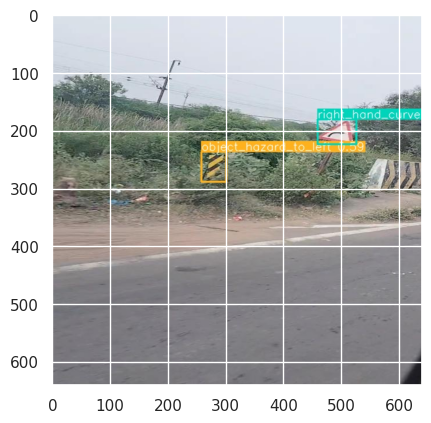

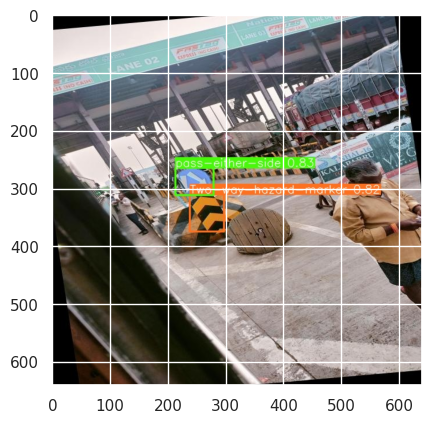

In [ ]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train3{i}/image0.jpg'))
    plt.show()